## Face and Facial Keypoint detection

After you've trained a neural network to detect facial keypoints, you can then apply this network to *any* image that includes faces. The neural network expects a Tensor of a certain size as input and, so, to detect any face, you'll first have to do some pre-processing.

1. Detect all the faces in an image using a face detector (we'll be using a Haar Cascade detector in this notebook).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that your net expects. This step will be similar to the `data_transform` you created and applied in Notebook 2, whose job was tp rescale, normalize, and turn any image into a Tensor to be accepted as input to your CNN.
3. Use your trained model to detect facial keypoints on the image.

---

In the next python cell we load in required libraries for this section of the project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


#### Select an image 

Select an image to perform facial keypoint detection on; you can select any image of faces in the `images/` directory.

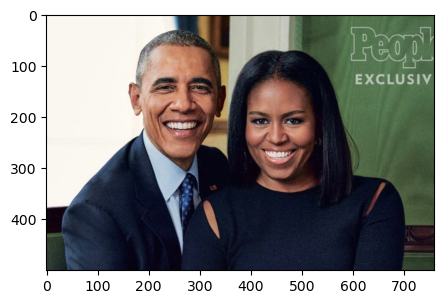

In [41]:
import cv2
# load in color image for face detection
image = cv2.imread('images/obamas.jpg')
#image = cv2.imread('images/the_beatles.jpg')
#image = cv2.imread('data/test/Manuel_Pellegrini_20.jpg')
# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(5,5))
plt.imshow(image)

## Detect all faces in an image

Next, you'll use one of OpenCV's pre-trained Haar Cascade classifiers, all of which can be found in the `detector_architectures/` directory, to find any faces in your selected image.

In the code below, we loop over each face in the original image and draw a red square on each face (in a copy of the original image, so as not to modify the original). You can even [add eye detections](https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html) as an *optional* exercise in using Haar detectors.

An example of face detection on a variety of images is shown below.

<img src='images/haar_cascade_ex.png' width=80% height=80%/>


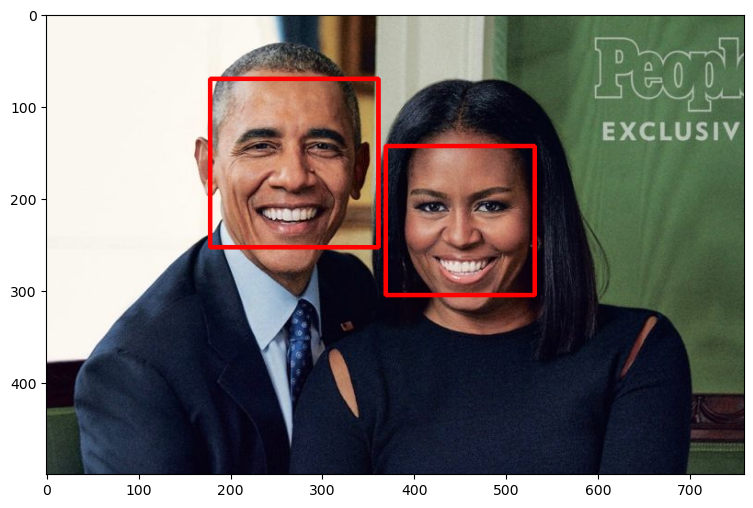

In [42]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector
# the output here is an array of detections; the corners of each detection box
# if necessary, modify these parameters until you successfully identify every face in a given image
faces = face_cascade.detectMultiScale(image, 1.3, 4)

# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

## Loading in a trained model

Once you have an image to work with (and, again, you can select any image of faces in the `images/` directory), the next step is to pre-process that image and feed it into your CNN facial keypoint detector.

First, load your best model by its filename.

In [4]:
%load_ext autoreload
%autoreload 2

import torch
from flexible_inception_net import FlexibleInceptionNet
from inception_net_config import inception_config1

net = FlexibleInceptionNet(
    num_keypoints=68,
    inception_configs=inception_config1,
    use_spatial_transform=True,
    use_residual=False,
    use_aux=True
)

## load the best saved model parameters (by your path name)
## You'll need to un-comment the line below and add the correct name for *your* saved model
net.load_state_dict(torch.load('optuna_best_model/best_model_flex_inception_config1_overall.pt'))

## print out your net and prepare it for testing (uncomment the line below)
net.eval()

Using auxiliary classifier in InceptionNet
Using spatial transformer (Resnet18SpatialTransformer) in InceptionNet


/tmp/ipykernel_395258/1911465488.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load('optuna_best_model/best_model_flex_inception_config1_ove

FlexibleInceptionNet(
  (stn): Resnet18SpatialTransformer(
    (localization): Sequential(
      (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
         

## Keypoint detection

Now, we'll loop over each detected face in an image (again!) only this time, you'll transform those faces in Tensors that your CNN can accept as input images.

### TODO: Transform each detected face into an input Tensor

You'll need to perform the following steps for each detected face:
1. Convert the face from RGB to grayscale
2. Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
3. Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
4. Reshape the numpy image into a torch image.

You may find it useful to consult to transformation code in `data_load.py` to help you perform these processing steps.


### TODO: Detect and display the predicted keypoints

After each face has been appropriately converted into an input Tensor for your network to see as input, you'll wrap that Tensor in a Variable() and can apply your `net` to each face. The ouput should be the predicted the facial keypoints. These keypoints will need to be "un-normalized" for display, and you may find it helpful to write a helper function like `show_keypoints`. You should end up with an image like the following with facial keypoints that closely match the facial features on each individual face:

<img src='images/michelle_detected.png' width=30% height=30%/>




I defined some inspection / debugging functions to resolve `scaling` problems.

In [5]:
def inspect_keypoints(output_pts):
    """
    Inspect the predicted keypoints for min and max values.
    
    Args:
    - output_pts (torch.Tensor): Predicted keypoints tensor.
    
    Prints:
    - Min and max values of the predicted keypoints.
    """
    # Ensure the tensor is on CPU and detached from the computation graph
    keypoints = output_pts.detach().cpu().numpy()

    # Check min and max values of the keypoints
    min_val = keypoints.min()
    max_val = keypoints.max()

    # Print min and max
    print()
    print("Keypoints after prediction:")
    print(f"Shape of output_pts: {output_pts.shape}")
    print(f"Min keypoint value: {min_val}")
    print(f"Max keypoint value: {max_val}")
    print()

In [39]:
# visualize the output
def visualize_output(test_images, test_outputs, mean=None, std=None):

    for i in range(len(test_images)):
        plt.figure(figsize=(15,5))
        ax = plt.subplot(1, len(test_images), i+1)

        # un-transform the image data
        image = test_images[i]
        
        # z-score denormalization
        if mean is not None and std is not None:
            image = image * std + mean
                
        # Rescale the image values from [0, 1] back to [0, 255]
        image = (image[0] * 255).astype(np.uint8)
                
        # un-transform the predicted key_pts data
        predicted_key_pts = test_outputs[i]
        
        # undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts * 50.0 + 100
                
        plt.imshow(image, cmap='gray')

        # Scatter the predicted keypoints on top of the image
        plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
        
        #plt.axis('off')

    plt.show()
    

In [51]:
def predict_keypoints(images, model, device='cuda'):
    """
    Predict facial keypoints for a list of preprocessed images.

    Args:
    - images (list of ndarrays): List of preprocessed images (e.g., after resizing, normalizing, etc.).
    - model (torch.nn.Module): Trained PyTorch model.
    - device (str): Device to run predictions on ('cpu' or 'cuda').

    Returns:
    - keypoints_list (list of ndarrays): List of predicted keypoints for each image.
    """
    model.to(device)
    model.eval()  # Set the model to evaluation mode

    keypoints_list = []

    with torch.no_grad():  # Disable gradient calculation for inference
        for img in images:
            # Convert the image to a torch tensor and add a batch dimension (1, C, H, W)
            img_tensor = torch.from_numpy(img).unsqueeze(0).to(device)
            img_tensor = img_tensor.float()                                    
            img_tensor = img_tensor.to(device)
            
            # Make prediction
            output_pts, _, _ = model(img_tensor)
            
            # Reshape output to be 68x2 (for 68 keypoints)
            output_pts = output_pts.view(output_pts.size()[0], 68, -1)            
            
            #inspect_keypoints(output_pts)
            
            # Convert to numpy and append to list (remove batch dimension)
            keypoints = output_pts.cpu().squeeze().numpy()
            keypoints_list.append(keypoints)

    return keypoints_list


In [8]:
def test_predictions_normalization(predicted_keypoints_list):
    """
    Test routine to check if the predicted keypoints are within the expected range 
    (e.g., [-1, 1] if normalized).
    
    Args:
    - predicted_keypoints_list (list of ndarrays): List of predicted keypoints for each image.

    Prints the number of keypoints out of the expected range and displays min and max
    values of predicted keypoints for each image.
    """
    total_images_checked = 0
    total_violations = 0

    for i, predicted_keypoints in enumerate(predicted_keypoints_list):
        # Convert to numpy if needed (assuming the keypoints are already numpy arrays)
        if isinstance(predicted_keypoints, torch.Tensor):
            predicted_keypoints = predicted_keypoints.numpy()

        # Count how many (x, y) pairs are out of the expected range [-1, 1]
        num_out_of_range = np.sum((predicted_keypoints < -1) | (predicted_keypoints > 1))

        # Get min and max values for the predicted keypoints
        min_val = np.min(predicted_keypoints)
        max_val = np.max(predicted_keypoints)

        if num_out_of_range > 0:
            print(f"Image {i}: {num_out_of_range} keypoints out of range.")

        # Print the min and max values for each image
        print(f"Image {i} - Min value: {min_val}, Max value: {max_val}")

        total_violations += num_out_of_range
        total_images_checked += 1

    print(f"\nChecked {total_images_checked} images.")
    if total_violations == 0:
        print("All predicted keypoints in all images are correctly within the expected range [-1, 1].")
    else:
        print(f"Total keypoints out of range: {total_violations}")


In [9]:
import torch
import numpy as np
import cv2

def check_image(image):
    """
    Test a numpy image for:
    a) Is it grayscale or not?
    b) Are values normalized or not?
    c) What are the dimensions of the image?
    
    Args:
    - image (ndarray): Input numpy array representing an image.
    
    Returns:
    None. Prints the results of the checks.
    """
    
    # Check if the image is grayscale
    if len(image.shape) == 2:
        print("Image is grayscale.")
    elif len(image.shape) == 3 and image.shape[0] == 1:
        print("Image is grayscale with a single channel dimension.")
    else:
        print("Image is not grayscale.")

    # Check if the values are normalized (between 0 and 1)
    if image.min() >= 0.0 and image.max() <= 1.0:
        print("Image values are normalized (between 0 and 1).")
    else:
        print(f"Image values are NOT normalized. Range: [{image.min()}, {image.max()}]")

    # Print the dimensions of the image
    print(f"Image dimensions: {image.shape}")



Only for the sake of testing it I loaded an image of the training set. I know, the net can best do with the images from the training set, but I needed that for the exploding keypoints problem (which I solved).

This is a test code block for checking with a `manually` loaded image from the test folder.

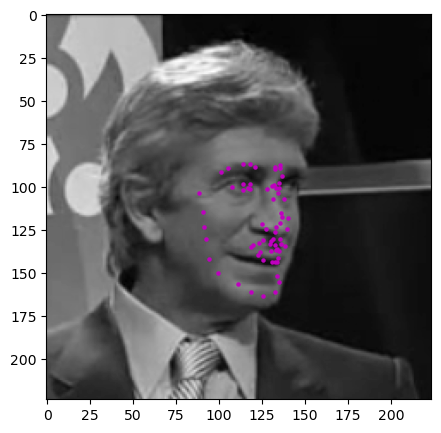

In [52]:
from predict_transform import prepare_img_for_prediction

ind_image = cv2.imread('data/test/Manuel_Pellegrini_20.jpg')

# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
ind_image = cv2.cvtColor(ind_image, cv2.COLOR_BGR2RGB)
ind_image_copy = np.copy(ind_image)

# loop over the detected faces from your haar cascade
rois = []

# Select the region of interest that is the face in the image 
roi = ind_image_copy

#Mean: tensor([0.3615])
#Std Dev: tensor([0.2330])

t_individual = prepare_img_for_prediction(roi, mean=0.3615, std=0.2330) # returns numpy darray

rois.append(t_individual)

## Make facial keypoint predictions using your loaded, trained network 
## perform a forward pass to get the predicted facial keypoints
keypoints_list = predict_keypoints(rois, net)
#test_predictions_normalization(keypoints_list)

## TODO: Display each detected face and the corresponding keypoints        
visualize_output(rois, keypoints_list, mean=0.3615, std=0.2330)

This is a test method to check the `statistical` mean `and` std for two images.

In [45]:
def compare_images_properties(img1, img2):
    properties = {}

    # Compare shapes
    properties['Shape'] = (img1.shape, img2.shape)

    # Pixel intensity range
    properties['Range'] = ((img1.min().item(), img1.max().item()), (img2.min().item(), img2.max().item()))

    # Mean and standard deviation of pixel intensities
    properties['Mean'] = (torch.mean(img1).item(), torch.mean(img2).item())
    properties['Std Dev'] = (torch.std(img1).item(), torch.std(img2).item())

    # Normalization check
    properties['Normalized (0-1 range)'] = (
        img1.min() >= 0 and img1.max() <= 1,
        img2.min() >= 0 and img2.max() <= 1,
    )

    return properties

The actual `prediction`:

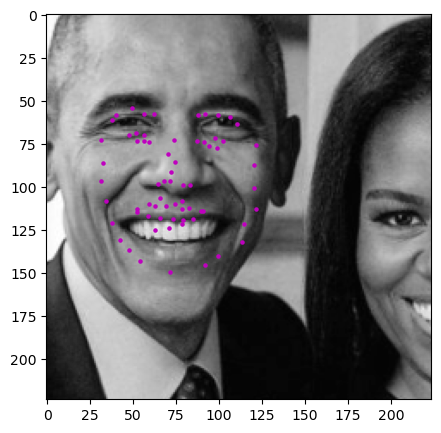

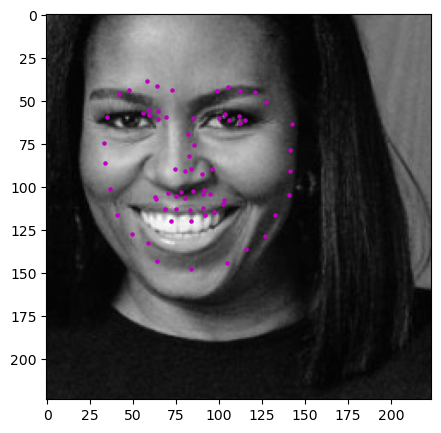

In [53]:
from predict_transform import prepare_img_for_prediction

image_copy = np.copy(image)

# loop over the detected faces from your haar cascade
rois = []
for (x,y,w,h) in faces:
    
    # Select the region of interest that is the face in the image 
    roi = image_copy[y:y+h+80, x:x+w+80]   

    image_predict = prepare_img_for_prediction(roi, mean=0.3615, std=0.2330)
    #check_image(t)

    #plt.imshow(np.squeeze(t), cmap='gray')
    #plt.show()
    
    rois.append(image_predict)
    
## Make facial keypoint predictions using your loaded, trained network 
## perform a forward pass to get the predicted facial keypoints
keypoints_list = predict_keypoints(rois, net)

#test_predictions_normalization(keypoints_list)

# Display each detected face and the corresponding keypoints        
visualize_output(rois, keypoints_list, mean=0.3615, std=0.2330)

# img1 = torch.from_numpy(t_individual).unsqueeze(0)
# img1 = img1.float()
# img2 = torch.from_numpy(image_predict).unsqueeze(0)
# img2 = img2.float()
# 
# properties = compare_images_properties(img1, img2)
# 
# for prop, values in properties.items():
#     print(f"{prop}: Image 1 - {values[0]}, Image 2 - {values[1]}")